# _Keras Classification Code Along Project_

Let's explore how to perform <ins>__classification tasks__</ins> with Keras API for TF 2.0

Here we will figure out how to identify and deal with overfitting with **Early Stopping Callbacks** and **Dropout Layers**. 
- <ins>Early Stopping Callbacks</ins>:
    + With this, Keras will stop training based on a loss condition in the validation data passed during the `model.fit()` call.
- <ins>Dropout Layers</ins>:
    + Are layers added to prevent overfitting by "turning off" neurons during training. 

_RECALL_:  
Overfitting is a model fits exactly against its training data but cannot perform accurately against unseen data. Read more about this here at the [IBM](https://www.ibm.com/topics/overfitting#:~:text=Overfitting%20is%20a%20concept%20in,unseen%20data%2C%20defeating%20its%20purpose.) or [AWS](https://aws.amazon.com/what-is/overfitting/#:~:text=Overfitting%20is%20an%20undesirable%20machine,on%20a%20known%20data%20set.) websites. 

## 1. The Data

Breast cancer wisconsin (diagnostic) dataset:
- This dataset consist of measurements of tumors and classifications determining if they are _malignant_ or _benign_.

Below, there consist of a breakdown of the dataset...

--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

    :Summary Statistics:

    ===================================== ====== ======
                                           Min    Max
    ===================================== ====== ======
    radius (mean):                        6.981  28.11
    texture (mean):                       9.71   39.28
    perimeter (mean):                     43.79  188.5
    area (mean):                          143.5  2501.0
    smoothness (mean):                    0.053  0.163
    compactness (mean):                   0.019  0.345
    concavity (mean):                     0.0    0.427
    concave points (mean):                0.0    0.201
    symmetry (mean):                      0.106  0.304
    fractal dimension (mean):             0.05   0.097
    radius (standard error):              0.112  2.873
    texture (standard error):             0.36   4.885
    perimeter (standard error):           0.757  21.98
    area (standard error):                6.802  542.2
    smoothness (standard error):          0.002  0.031
    compactness (standard error):         0.002  0.135
    concavity (standard error):           0.0    0.396
    concave points (standard error):      0.0    0.053
    symmetry (standard error):            0.008  0.079
    fractal dimension (standard error):   0.001  0.03
    radius (worst):                       7.93   36.04
    texture (worst):                      12.02  49.54
    perimeter (worst):                    50.41  251.2
    area (worst):                         185.2  4254.0
    smoothness (worst):                   0.071  0.223
    compactness (worst):                  0.027  1.058
    concavity (worst):                    0.0    1.252
    concave points (worst):               0.0    0.291
    symmetry (worst):                     0.156  0.664
    fractal dimension (worst):            0.055  0.208
    ===================================== ====== ======

    :Missing Attribute Values: None

    :Class Distribution: 212 - Malignant, 357 - Benign

    :Creator:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

    :Donor: Nick Street

    :Date: November, 1995

This is a copy of [UCI ML Breast Cancer Wisconsin (Diagnostic)](https://goo.gl/U2Uwz2) datasets.

Features are computed from a digitized image of a fine needle
aspirate (FNA) of a breast mass.  They describe
characteristics of the cell nuclei present in the image.

Separating plane described above was obtained using
Multisurface Method-Tree (MSM-T) _[K. P. Bennett, "Decision Tree
Construction Via Linear Programming." Proceedings of the 4th
Midwest Artificial Intelligence and Cognitive Science Society,
pp. 97-101, 1992]_, a classification method which uses linear
programming to construct a decision tree.  Relevant features
were selected using an exhaustive search in the space of 1-4
features and 1-3 separating planes.

The actual linear program used to obtain the separating plane
in the 3-dimensional space is that described in:  
_[K. P. Bennett and O. L. Mangasarian: "Robust Linear
Programming Discrimination of Two Linearly Inseparable Sets",
Optimization Methods and Software 1, 1992, 23-34]_.

This database is also available through the UW CS ftp server:
```
ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/
```

<ins>References</ins>:
   - W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction 
     for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on 
     Electronic Imaging: Science and Technology, volume 1905, pages 861-870,
     San Jose, CA, 1993.
   - O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and 
     prognosis via linear programming. Operations Research, 43(4), pages 570-577, 
     July-August 1995.
   - W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques
     to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994) 
     163-171.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Data/cancer_classification.csv')

In [3]:
df.info()
# Although the 'Dataset Characteristics' stated no nulls, good to double check

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
df.describe().transpose()
# Also good to explore the distribution features

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


# I. EDA

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

For classififcation tasks, its a good idea to start off with a _count plot_ of the labels to see number of instances per label

<Axes: xlabel='benign_0__mal_1', ylabel='count'>

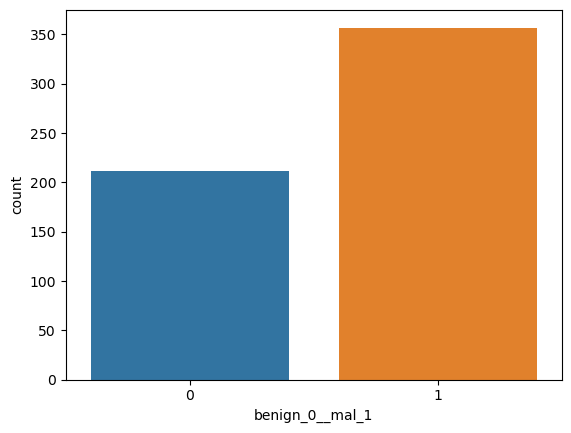

In [5]:
sns.countplot(x='benign_0__mal_1',data=df)

# Observations: 
#    - The difference between the two is 100-150. Not _too_ extreme so we can look past

<Axes: >

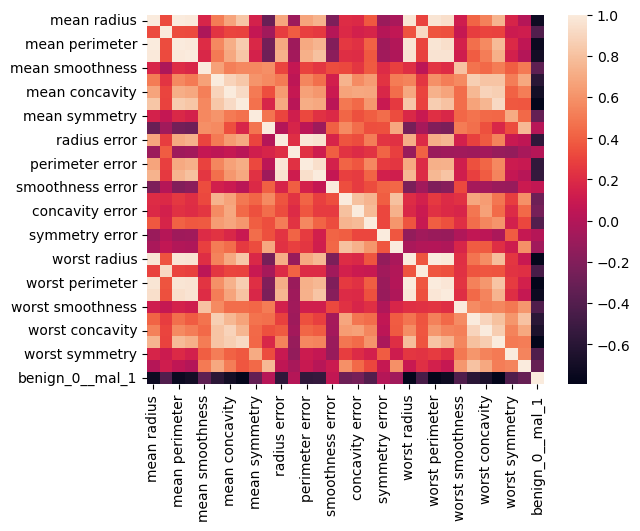

In [7]:
# Creating heat map
sns.heatmap(df.corr())

There is a lot of data here, kinda noisy so its hard to understand. So let's view the correlations with respect to the labels in question. 

In [10]:
df.corr()['benign_0__mal_1'].sort_values(ascending=False)

benign_0__mal_1            1.000000
smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
fractal dimension error   -0.077972
concavity error           -0.253730
compactness error         -0.292999
worst fractal dimension   -0.323872
mean symmetry             -0.330499
mean smoothness           -0.358560
concave points error      -0.408042
mean texture              -0.415185
worst symmetry            -0.416294
worst smoothness          -0.421465
worst texture             -0.456903
area error                -0.548236
perimeter error           -0.556141
radius error              -0.567134
worst compactness         -0.590998
mean compactness          -0.596534
worst concavity           -0.659610
mean concavity            -0.696360
mean area                 -0.708984
mean radius               -0.730029
worst area                -0.733825
mean perimeter            -0.742636
worst radius              -0

Given the amount of features, it may be helpful to plot out the correlations

<Axes: >

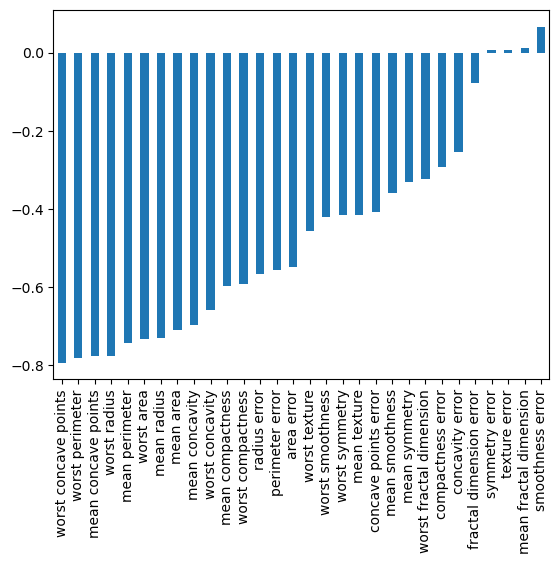

In [13]:
# Dropping the `benign_0__mal_1` feature as it will alwasy have a corr of 1
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

From our brief EDA, we can see that there are many highly _negative_ correlations. This can still be very useful for our model to get strong predictions. 

## 1. Train Test Split

In [14]:
# Labels
X = df.drop('benign_0__mal_1',axis=1).values
# Features
y = df['benign_0__mal_1'].values

# REMINDER:
#    - scaling takes in an array therefor the `.values` method

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
# Splitting
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

# Dropping test_size a bit given lack of data


## 2. Scaling Data

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
# Creating object from class
scaler = MinMaxScaler()

# Skipping the following line in favor of the `.fit_transform()` method
# scaler.fit(X_train)

# Remember to fit only to training data to revent data leakage
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# II. The Model

## 1. Creating the Model

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
                  
    

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [21]:
X_train.shape

(426, 30)

To help figure out how many layers and nodes to add to NN, refer to this [StackExchange page](https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw)

In [22]:
model = Sequential()

# HIDDEN Layers
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))

# Final OUTPUT layer
#    -NOTE: for BINARY, the last layer should be `sigmoid`
model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

## 2. Training the Model 

Helpful Resources: 
- [Batch Size vs Number of Iterations](https://stats.stackexchange.com/questions/164876/tradeoff-batch-size-vs-number-of-iterations-to-train-a-neural-network)
    + tl;dr
        + "It has been observed in practice that when using a larger batch there is a significant degradation in the quality of the model, as measured by its ability to generalize."
        + "The lack of generalization ability is due to the fact that large-batch methods tend to converge to sharp minimizers of the training function."
- [Choosing Batch Sizes](https://datascience.stackexchange.com/questions/18414/are-there-any-rules-for-choosing-the-size-of-a-mini-batch)
    + tl;dr
        + Use mini-batch gradient descent if you have a large training set. Else for a small training set, use batch gradient descent.
        + Mini-batch sizes are often chosen as a power of 2, i.e., 16,32,64,128,256 etc.
        + Now, while choosing a proper size for mini-batch gradient descent, make sure that the minibatch fits in the CPU/GPU.
        + 32 is generally a good choice

### <ins>_Ex. 1_</ins>: OVERFITTING by choosing too many epochs

In [23]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), 
          verbose=1
          )

Epoch 1/600
14/14 [==============================] - 2s 19ms/step - loss: 0.6725 - val_loss: 0.6468
Epoch 2/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6241 - val_loss: 0.5997
Epoch 3/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5795 - val_loss: 0.5514
Epoch 4/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5318 - val_loss: 0.4994
Epoch 5/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4824 - val_loss: 0.4472
Epoch 6/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4316 - val_loss: 0.3964
Epoch 7/600
14/14 [==============================] - 0s 7ms/step - loss: 0.3834 - val_loss: 0.3481
Epoch 8/600
14/14 [==============================] - 0s 9ms/step - loss: 0.3428 - val_loss: 0.3088
Epoch 9/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3077 - val_loss: 0.2746
Epoch 10/600
14/14 [==============================] - 0s 6ms/step - loss: 0.2768 - val_loss: 0.2489
Epoch 11

Epoch 83/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0546 - val_loss: 0.1156
Epoch 84/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0532 - val_loss: 0.1093
Epoch 85/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0513 - val_loss: 0.1155
Epoch 86/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0514 - val_loss: 0.1171
Epoch 87/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0517 - val_loss: 0.1158
Epoch 88/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0504 - val_loss: 0.1179
Epoch 89/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0514 - val_loss: 0.1186
Epoch 90/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0497 - val_loss: 0.1133
Epoch 91/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0500 - val_loss: 0.1168
Epoch 92/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0516 - val_loss: 0.1177


14/14 [==============================] - 0s 5ms/step - loss: 0.0390 - val_loss: 0.1312
Epoch 165/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0333 - val_loss: 0.1406
Epoch 166/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0374 - val_loss: 0.1303
Epoch 167/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0355 - val_loss: 0.1351
Epoch 168/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0334 - val_loss: 0.1376
Epoch 169/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0328 - val_loss: 0.1310
Epoch 170/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0330 - val_loss: 0.1306
Epoch 171/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0324 - val_loss: 0.1345
Epoch 172/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0371 - val_loss: 0.1321
Epoch 173/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0330 - val_loss: 0.1380
Epoc

14/14 [==============================] - 0s 6ms/step - loss: 0.0221 - val_loss: 0.1551
Epoch 246/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0211 - val_loss: 0.1487
Epoch 247/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0201 - val_loss: 0.1490
Epoch 248/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0199 - val_loss: 0.1586
Epoch 249/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0236 - val_loss: 0.1435
Epoch 250/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0210 - val_loss: 0.1533
Epoch 251/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0201 - val_loss: 0.1501
Epoch 252/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0205 - val_loss: 0.1602
Epoch 253/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0207 - val_loss: 0.1584
Epoch 254/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0208 - val_loss: 0.1499
Epoc

14/14 [==============================] - 0s 5ms/step - loss: 0.0116 - val_loss: 0.1910
Epoch 327/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0112 - val_loss: 0.1916
Epoch 328/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0109 - val_loss: 0.1941
Epoch 329/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0112 - val_loss: 0.2058
Epoch 330/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0116 - val_loss: 0.1888
Epoch 331/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0103 - val_loss: 0.2236
Epoch 332/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0111 - val_loss: 0.1887
Epoch 333/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0119 - val_loss: 0.2095
Epoch 334/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0109 - val_loss: 0.1966
Epoch 335/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0110 - val_loss: 0.1962
Epoc

14/14 [==============================] - 0s 8ms/step - loss: 0.0060 - val_loss: 0.2401
Epoch 408/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0062 - val_loss: 0.2423
Epoch 409/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0061 - val_loss: 0.2536
Epoch 410/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0067 - val_loss: 0.2432
Epoch 411/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0083 - val_loss: 0.2321
Epoch 412/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0075 - val_loss: 0.2637
Epoch 413/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0069 - val_loss: 0.2362
Epoch 414/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0063 - val_loss: 0.2745
Epoch 415/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0063 - val_loss: 0.2298
Epoch 416/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0067 - val_loss: 0.2540
Epoc

14/14 [==============================] - 0s 6ms/step - loss: 0.0032 - val_loss: 0.2845
Epoch 489/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0034 - val_loss: 0.2974
Epoch 490/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0032 - val_loss: 0.2826
Epoch 491/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0035 - val_loss: 0.2975
Epoch 492/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0049 - val_loss: 0.2565
Epoch 493/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0073 - val_loss: 0.3382
Epoch 494/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0095 - val_loss: 0.3853
Epoch 495/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0057 - val_loss: 0.2591
Epoch 496/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0047 - val_loss: 0.3000
Epoch 497/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0033 - val_loss: 0.2657
Epoc

14/14 [==============================] - 0s 7ms/step - loss: 0.0019 - val_loss: 0.3117
Epoch 570/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0018 - val_loss: 0.3379
Epoch 571/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0026 - val_loss: 0.3209
Epoch 572/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0026 - val_loss: 0.3509
Epoch 573/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0021 - val_loss: 0.3264
Epoch 574/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0028 - val_loss: 0.3156
Epoch 575/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0025 - val_loss: 0.3419
Epoch 576/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0020 - val_loss: 0.3215
Epoch 577/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0018 - val_loss: 0.3284
Epoch 578/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0016 - val_loss: 0.3227
Epoc

<Axes: >

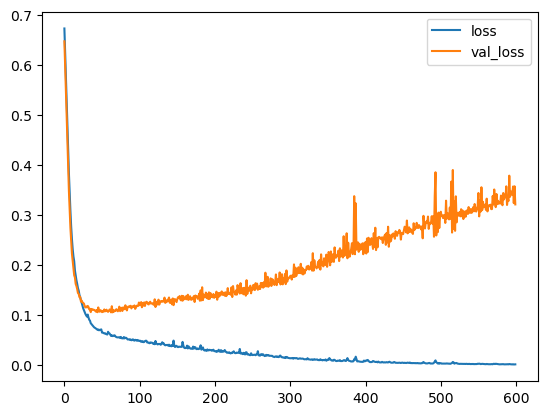

In [26]:
model_loss = pd.DataFrame(model.history.history)
# model_loss

model_loss.plot()

This is a perfect example of **overfitting**.  

What are some characteristics of overfitting?
- In the beginning, w/in the first bunch of epochs, we see that the validation and training losses are decreasing. 
    + this is a good characteristic
- But at a certain point, while the training loss is still decreasing, the validation loss starts to increase. 
    + this is a sign of overfitting therefore overfitting to training data and predictions are getting worse.

### <ins>_Ex. 2_</ins>: Early Stopping

After overfitting, let's try and use **early stopping** to _track the validation loss and stop training once it begins increasing too much_. 

In [27]:
# Recreating model as to not train on an already trained model
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [28]:
# One of many callbacks that can be used
from tensorflow.keras.callbacks import EarlyStopping

Stop training when a monitored quantity has stopped improving. The info below is from calling `help(EarlyStopping)`

    Arguments:
        monitor: Quantity to be monitored.
        min_delta: Minimum change in the monitored quantity
            to qualify as an improvement, i.e. an absolute
            change of less than min_delta, will count as no
            improvement.
        patience: Number of epochs with no improvement
            after which training will be stopped.
        verbose: verbosity mode.
        mode: One of `{"auto", "min", "max"}`. In `min` mode,
            training will stop when the quantity
            monitored has stopped decreasing; in `max`
            mode it will stop when the quantity
            monitored has stopped increasing; in `auto`
            mode, the direction is automatically inferred
            from the name of the monitored quantity.

In [29]:
# Creating object from class
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

# Arguements
#    - monitor='val_loss'
#        - self explanatory
#    - mode='min'
#        - minimize loss
#        - maximize accuracy or precision
#        - auto usually works good, but its good to make sure and manually enter
#    - patience=25
#        - wait 25 epochs after detecting a stoppin gpoint to account for noise

In [30]:
# same fit, but now including the callback arguement
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), 
          verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
14/14 [==============================] - 2s 23ms/step - loss: 0.7010 - val_loss: 0.6737
Epoch 2/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6528 - val_loss: 0.6298
Epoch 3/600
14/14 [==============================] - 0s 10ms/step - loss: 0.6104 - val_loss: 0.5859
Epoch 4/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5672 - val_loss: 0.5393
Epoch 5/600
14/14 [==============================] - 0s 8ms/step - loss: 0.5206 - val_loss: 0.4919
Epoch 6/600
14/14 [==============================] - 0s 11ms/step - loss: 0.4749 - val_loss: 0.4429
Epoch 7/600
14/14 [==============================] - 0s 8ms/step - loss: 0.4281 - val_loss: 0.3972
Epoch 8/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3829 - val_loss: 0.3489
Epoch 9/600
14/14 [==============================] - 0s 7ms/step - loss: 0.3404 - val_loss: 0.3084
Epoch 10/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3046 - val_loss: 0.2743
Epoch 

Epoch 83/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0511 - val_loss: 0.1019
Epoch 84/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0513 - val_loss: 0.1068
Epoch 85/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0509 - val_loss: 0.1035
Epoch 86/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0514 - val_loss: 0.1045
Epoch 87/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0498 - val_loss: 0.1065
Epoch 88/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0498 - val_loss: 0.1033
Epoch 89/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0502 - val_loss: 0.1056
Epoch 90/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0497 - val_loss: 0.1079
Epoch 91/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0495 - val_loss: 0.1080
Epoch 92/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0518 - val_loss: 0.1080


From the outputs, we can see that the model stopped training after $93$ epochs

<Axes: >

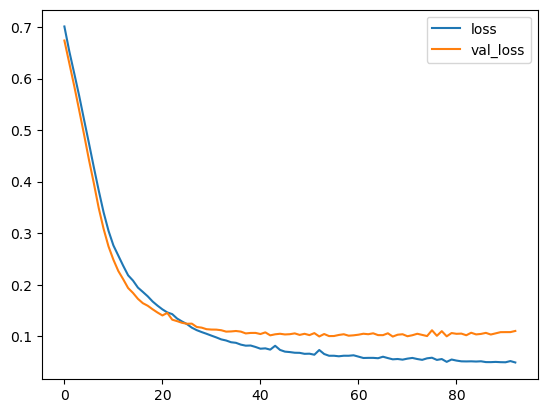

In [33]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

This is a much better looking graph of losses. 
- Both losses are decreasing.
- Right as the validation loss line starts to separate from the training loss, thats when the model stops training.

### <ins>Ex 3</ins>: Adding in DROPOUT Layers

Dropout layer will basically "turn off" a percentage of neurons randomly. 

In [34]:
from tensorflow.keras.layers import Dropout

In [35]:
# Recreating Model w/ dropout layers
model = Sequential()

model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))   # <--- during each batch/epoch, 50% of the neurons will be turned off randomly

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))   # <--- during each batch/epoch, 50% of the neurons will be turned off randomly

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [36]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), 
          verbose=1,
          callbacks=[early_stop]   # <--- still including early stopping
          )

Epoch 1/600
14/14 [==============================] - 1s 17ms/step - loss: 0.6752 - val_loss: 0.6340
Epoch 2/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6234 - val_loss: 0.6088
Epoch 3/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6318 - val_loss: 0.5871
Epoch 4/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6270 - val_loss: 0.5678
Epoch 5/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6013 - val_loss: 0.5462
Epoch 6/600
14/14 [==============================] - 0s 9ms/step - loss: 0.5690 - val_loss: 0.5182
Epoch 7/600
14/14 [==============================] - 0s 9ms/step - loss: 0.5614 - val_loss: 0.4956
Epoch 8/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5537 - val_loss: 0.4683
Epoch 9/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5167 - val_loss: 0.4410
Epoch 10/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5023 - val_loss: 0.4139
Epoch 11

Epoch 83/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1065 - val_loss: 0.1000
Epoch 84/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1147 - val_loss: 0.1076
Epoch 85/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1099 - val_loss: 0.0957
Epoch 86/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1154 - val_loss: 0.0943
Epoch 87/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1197 - val_loss: 0.1003
Epoch 88/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1142 - val_loss: 0.0966
Epoch 89/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1028 - val_loss: 0.0997
Epoch 90/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1024 - val_loss: 0.0973
Epoch 91/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1110 - val_loss: 0.0929
Epoch 92/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1238 - val_loss: 0.0928


From the outputs, we can see that the model stopped training after $155$ epochs. This time 'round, the model ran for a bit longer, which is good bc that means its still learning on the further epochs

<Axes: >

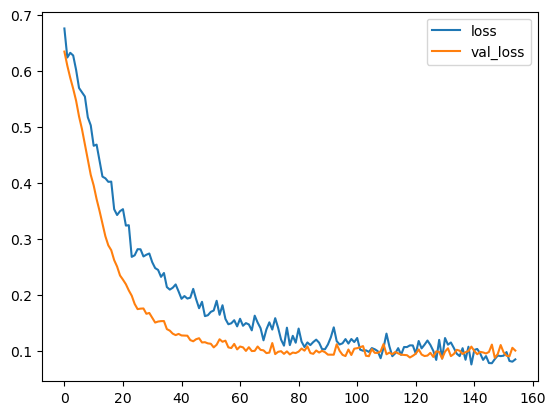

In [37]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

This is the best behavior we have so far. 
- The training and validation losses are decreasing pretty quick. 
- They are both flattening out at the same rate, and there is no separations

## 3. Model Evaluation

In [47]:
# Given this is a classification, we will use `.predict_classes()`
# __BUT__
# This method has been deprecated from later TF versions
# 
# predictions = model.predict_classes(X_test)

# THEREFORE, use the following....

# Milti-class Classification
# predictions = np.argmax(model.predict(X_test), axis=-1)
# 
# Binary Classification
predictions = (model.predict(X_test) > 0.5).astype("int32")

5/5 [==============================] - 0s 2ms/step


In [40]:
from sklearn.metrics import classification_report,confusion_matrix

In [50]:
# https://en.wikipedia.org/wiki/Precision_and_recall
print("Classification Report:")
print("")
print(classification_report(y_test,predictions))

Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [51]:
print("Confusion Matrix:")
print("")
print(confusion_matrix(y_test,predictions))

Confusion Matrix:

[[54  1]
 [ 2 86]]


This model performed very well and only misclassified three 